In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
dataset=pd.read_csv("medical.csv")
dataset.head()

Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [5]:
dataset.duplicated().sum()

7644

In [6]:
dataset[dataset.duplicated()]

Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
100007         8.0  28.0    Male  186.489402  52.389752         AB  15.063921   
100011        12.0  34.0  Female  182.416302  76.371050         AB  22.950992   
100018        19.0  31.0  Female  158.790160  46.829849         AB  18.572723   
100022        23.0  29.0  Female  179.909041  90.679436         AB  28.015787   
100023        24.0  18.0    Male         NaN  52.521560         AB  13.570402   
...            ...   ...     ...         ...        ...        ...        ...   
199961     99962.0  31.0    Male  180.859321  43.647709          B  13.343804   
199962     99963.0  18.0  Female  180.133710  48.381499          A  14.910401   
199965     99966.0  22.0  Female  166.562901  48.684146         AB  17.548137   
199973     99974.0  25.0  Female  156.297842  90.690186          B  37.123963   
199985     99986.0  23.0  Female  162.884951  82.485778          B  31.089745   

        Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
100007    98.227788        85.0           123.0        128.0       No      No  
100011    98.118274        86.0            97.0        247.0       No      No  
100018    98.784709        92.0           102.0        172.0      NaN      No  
100022    98.782269        81.0           108.0        227.0       No     Yes  
100023    98.215090        60.0           132.0        217.0       No      No  
...             ...         ...             ...          ...      ...     ...  
199961    98.675411        68.0            90.0        223.0       No      No  
199962    98.104064        71.0           129.0        184.0       No      No  
199965    98.776134        95.0           109.0        152.0      Yes      No  
199973    98.664591        70.0           132.0        164.0      Yes      No  
199985    98.852347        65.0            94.0        188.0       No     Yes  

[7644 rows x 13 columns]

In [7]:
dataset.drop_duplicates(inplace=True)
dataset.duplicated().sum()

0

In [8]:
dataset.isnull().sum()

Student ID        19891
Age               19892
Gender            19924
Height            19907
Weight            19901
Blood Type        19916
BMI               19900
Temperature       19911
Heart Rate        19903
Blood Pressure    19892
Cholesterol       19893
Diabetes          19905
Smoking           19897
dtype: int64

<Axes: >

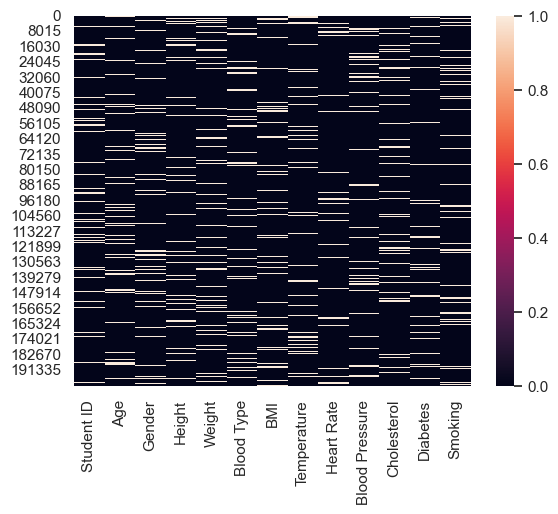

In [9]:
sns.heatmap(dataset.isnull())

<Axes: >

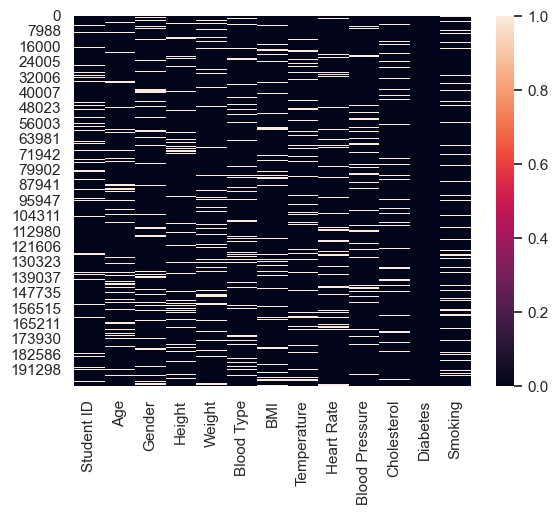

In [10]:
dataset.dropna(subset='Diabetes',inplace=True)
sns.heatmap(dataset.isnull())

In [11]:
# on peut voir qu'on a principalement des floats et object
dataset.dtypes

Student ID        float64
Age               float64
Gender             object
Height            float64
Weight            float64
Blood Type         object
BMI               float64
Temperature       float64
Heart Rate        float64
Blood Pressure    float64
Cholesterol       float64
Diabetes           object
Smoking            object
dtype: object

In [12]:
#on va supprimer la colonne student id vu qu'on ne va pas l'utiliser pour le modéle
dataset.drop("Student ID",axis=1,inplace=True)
#on va séparer nos colonnes en deux les colonnes qui contiennent des valeurs numériques et ceux qui ont des va
colonne_numeriques=list(dataset.select_dtypes('float64').columns)
colonne_categoriques_with_target=list(dataset.select_dtypes('object').columns)
print(f'colonne_numériques:{colonne_numeriques}, colonne_catégorique:{colonne_categoriques_with_target}')

colonne_numériques:['Age', 'Height', 'Weight', 'BMI', 'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol'], colonne_catégorique:['Gender', 'Blood Type', 'Diabetes', 'Smoking']


In [13]:
colonne_categoriques = [i for i in colonne_categoriques_with_target if i != "Diabetes"]
colonne_categoriques

['Gender', 'Blood Type', 'Smoking']

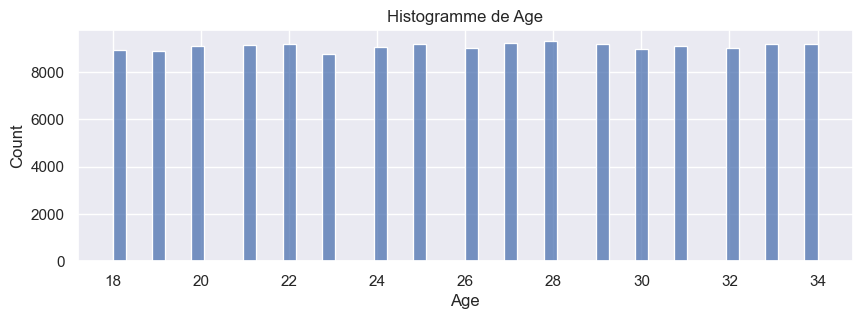

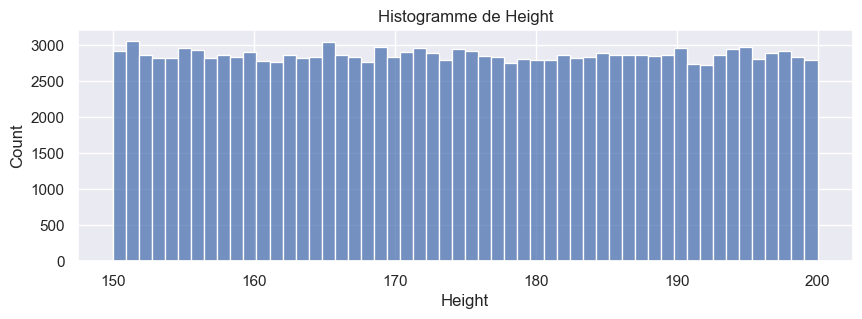

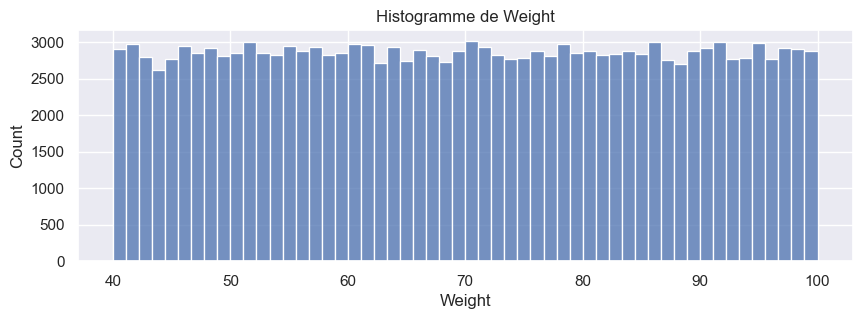

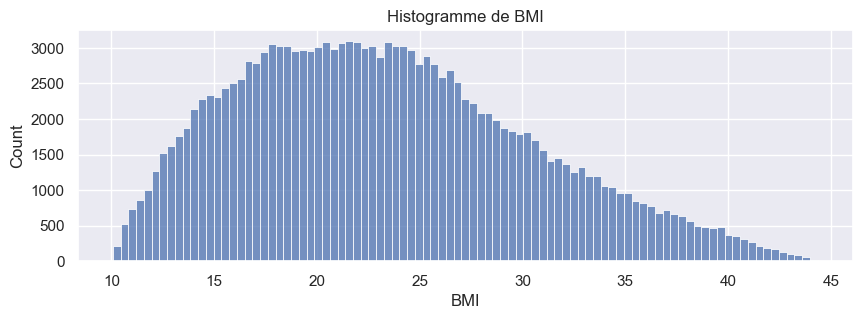

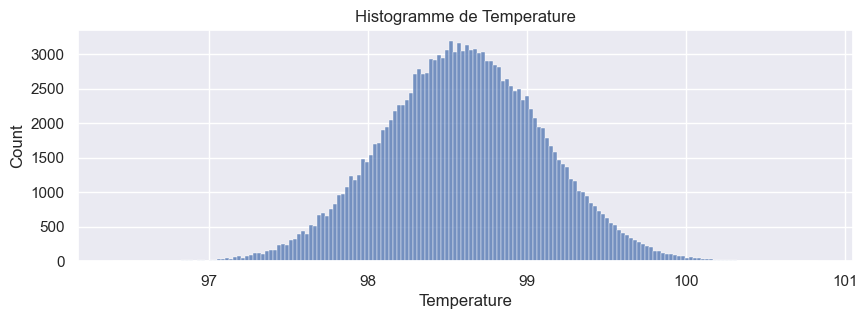

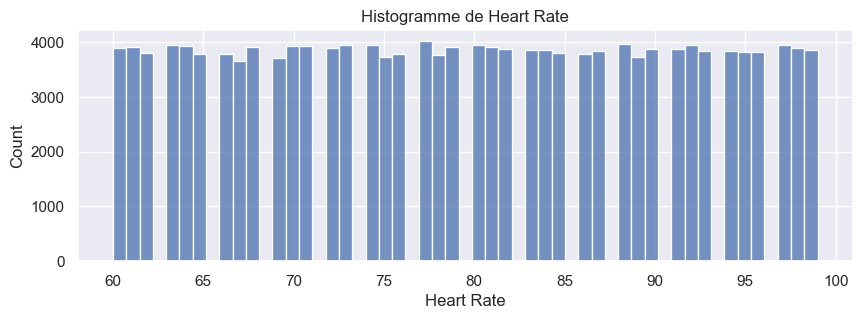

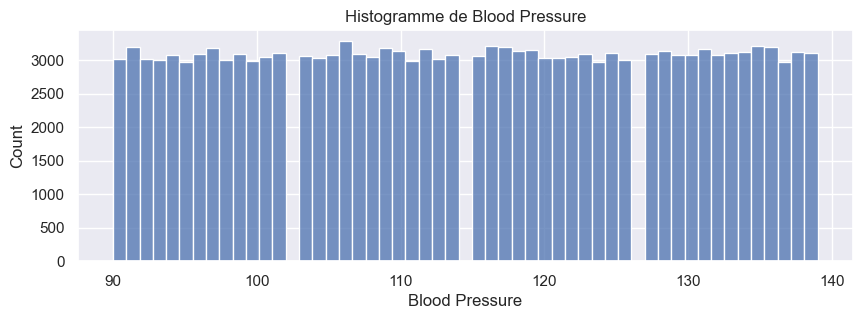

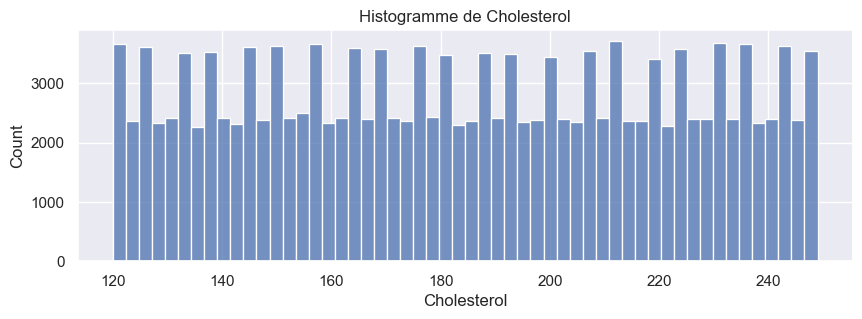

In [14]:
#il s'agira de créer un modéle de machine learning pour voir si la personne est diabétique ou non
#analyse des valeurs numériques on va voir la distribution de nos différentes valeurs
for val in colonne_numeriques:
    plt.figure(figsize=(10, 3))
    palette = {"No": 'blue', "Yes": 'orange'}
    sns.histplot(data=dataset, x=val)
    plt.title(f'Histogramme de {val}')
    
    plt.show()

In [15]:
#on va voir les elements contenus dans nos différentes colonnes catégoriques
valeur={}
for colonne in colonne_categoriques_with_target:
    valeur[colonne]=dataset[colonne].unique()
valeur

{'Gender': array(['Female', 'Male', nan], dtype=object),
 'Blood Type': array(['O', 'B', 'A', 'AB', nan], dtype=object),
 'Diabetes': array(['No', 'Yes'], dtype=object),
 'Smoking': array([nan, 'No', 'Yes'], dtype=object)}

In [16]:
#on essai de voir comment sont réparties les données de 
dataset.Diabetes.value_counts(normalize=True)

Diabetes
No     0.899763
Yes    0.100237
Name: proportion, dtype: float64

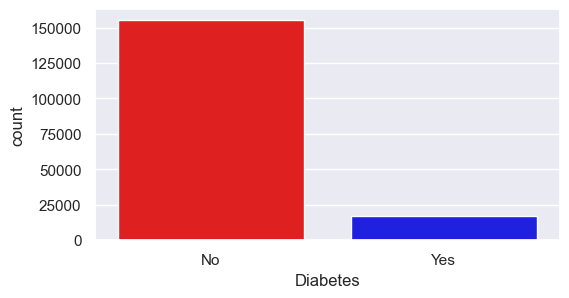

In [17]:
palette={"Yes":"blue","No":"red"}
f, ax = plt.subplots(figsize=(6, 3))
ax = sns.countplot(x="Diabetes", data=dataset,palette=palette)
plt.show()

## constat
on voit que notre colonne target est constitué de 90% de Non , les deux classes sont déséquilibrées.Donc pour l'évaluation de notre modéle il serait plus interessant d'utiliser des métriques tels que le f1-score , les matrices de confusion , recall et précision.

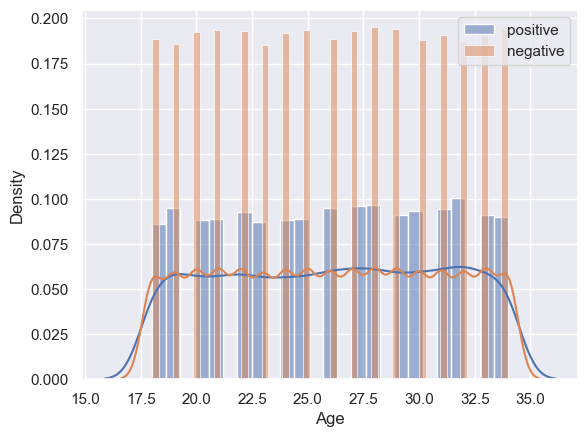

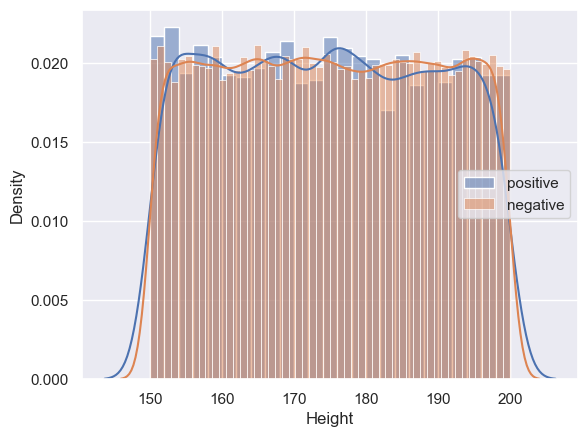

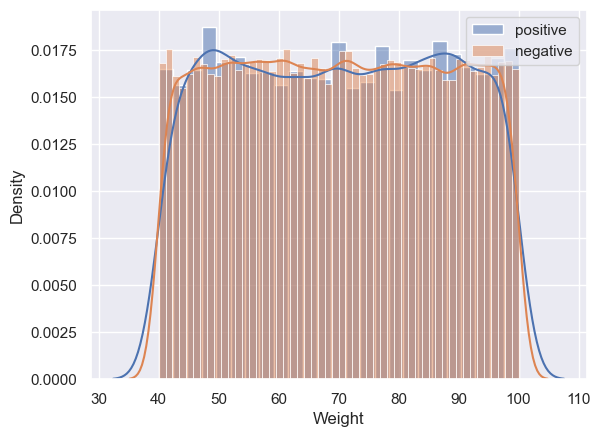

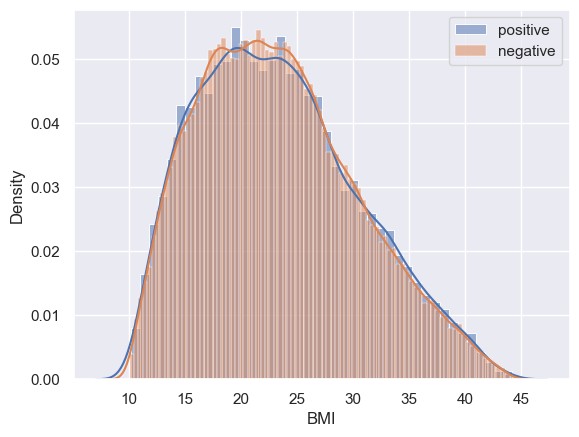

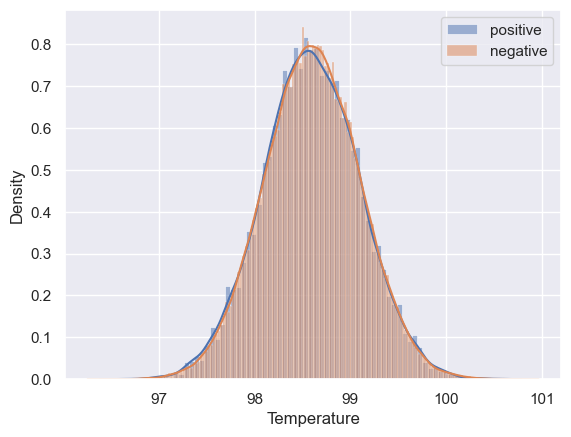

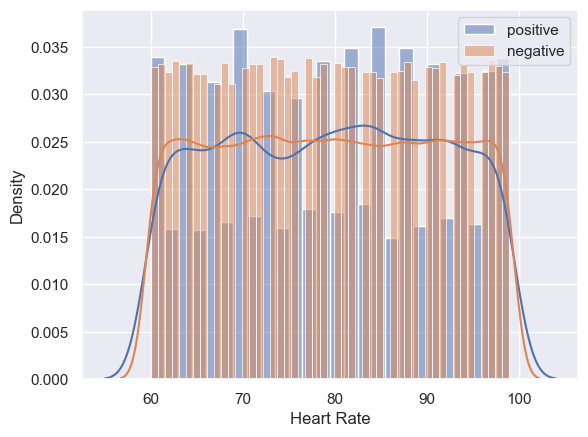

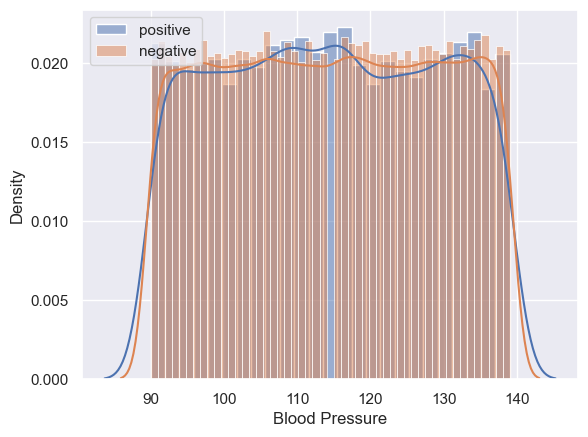

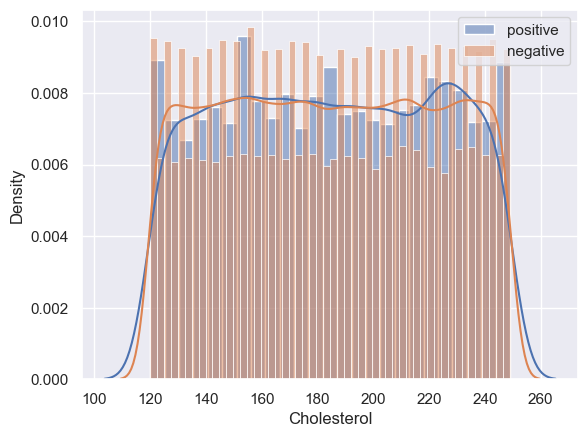

In [18]:
for val in colonne_numeriques:
        plt.figure()
        sns.histplot(dataset[dataset.Diabetes=="Yes"][val] , kde=True, stat="density", kde_kws=dict(cut=3),label="positive")
        sns.histplot(dataset[dataset.Diabetes=="No"][val], kde=True,stat="density", kde_kws=dict(cut=3),label="negative")
        plt.legend()

## Constat
Generalement on ne voit pas de grandes différences entre nos différentes données dans les cas ou ils sont pas diabétiques ou pas.a part
pour le Heart rate et Blood pressure ou on peut voir un différence.

<Axes: >

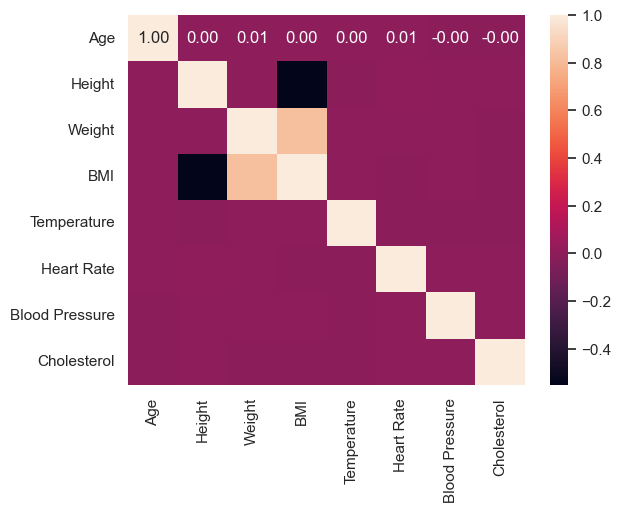

In [19]:
#on va voir les corréllation entre nos différentes valeurs numériques
sns.heatmap(dataset[colonne_numeriques].corr(),annot=True,fmt='.2f')

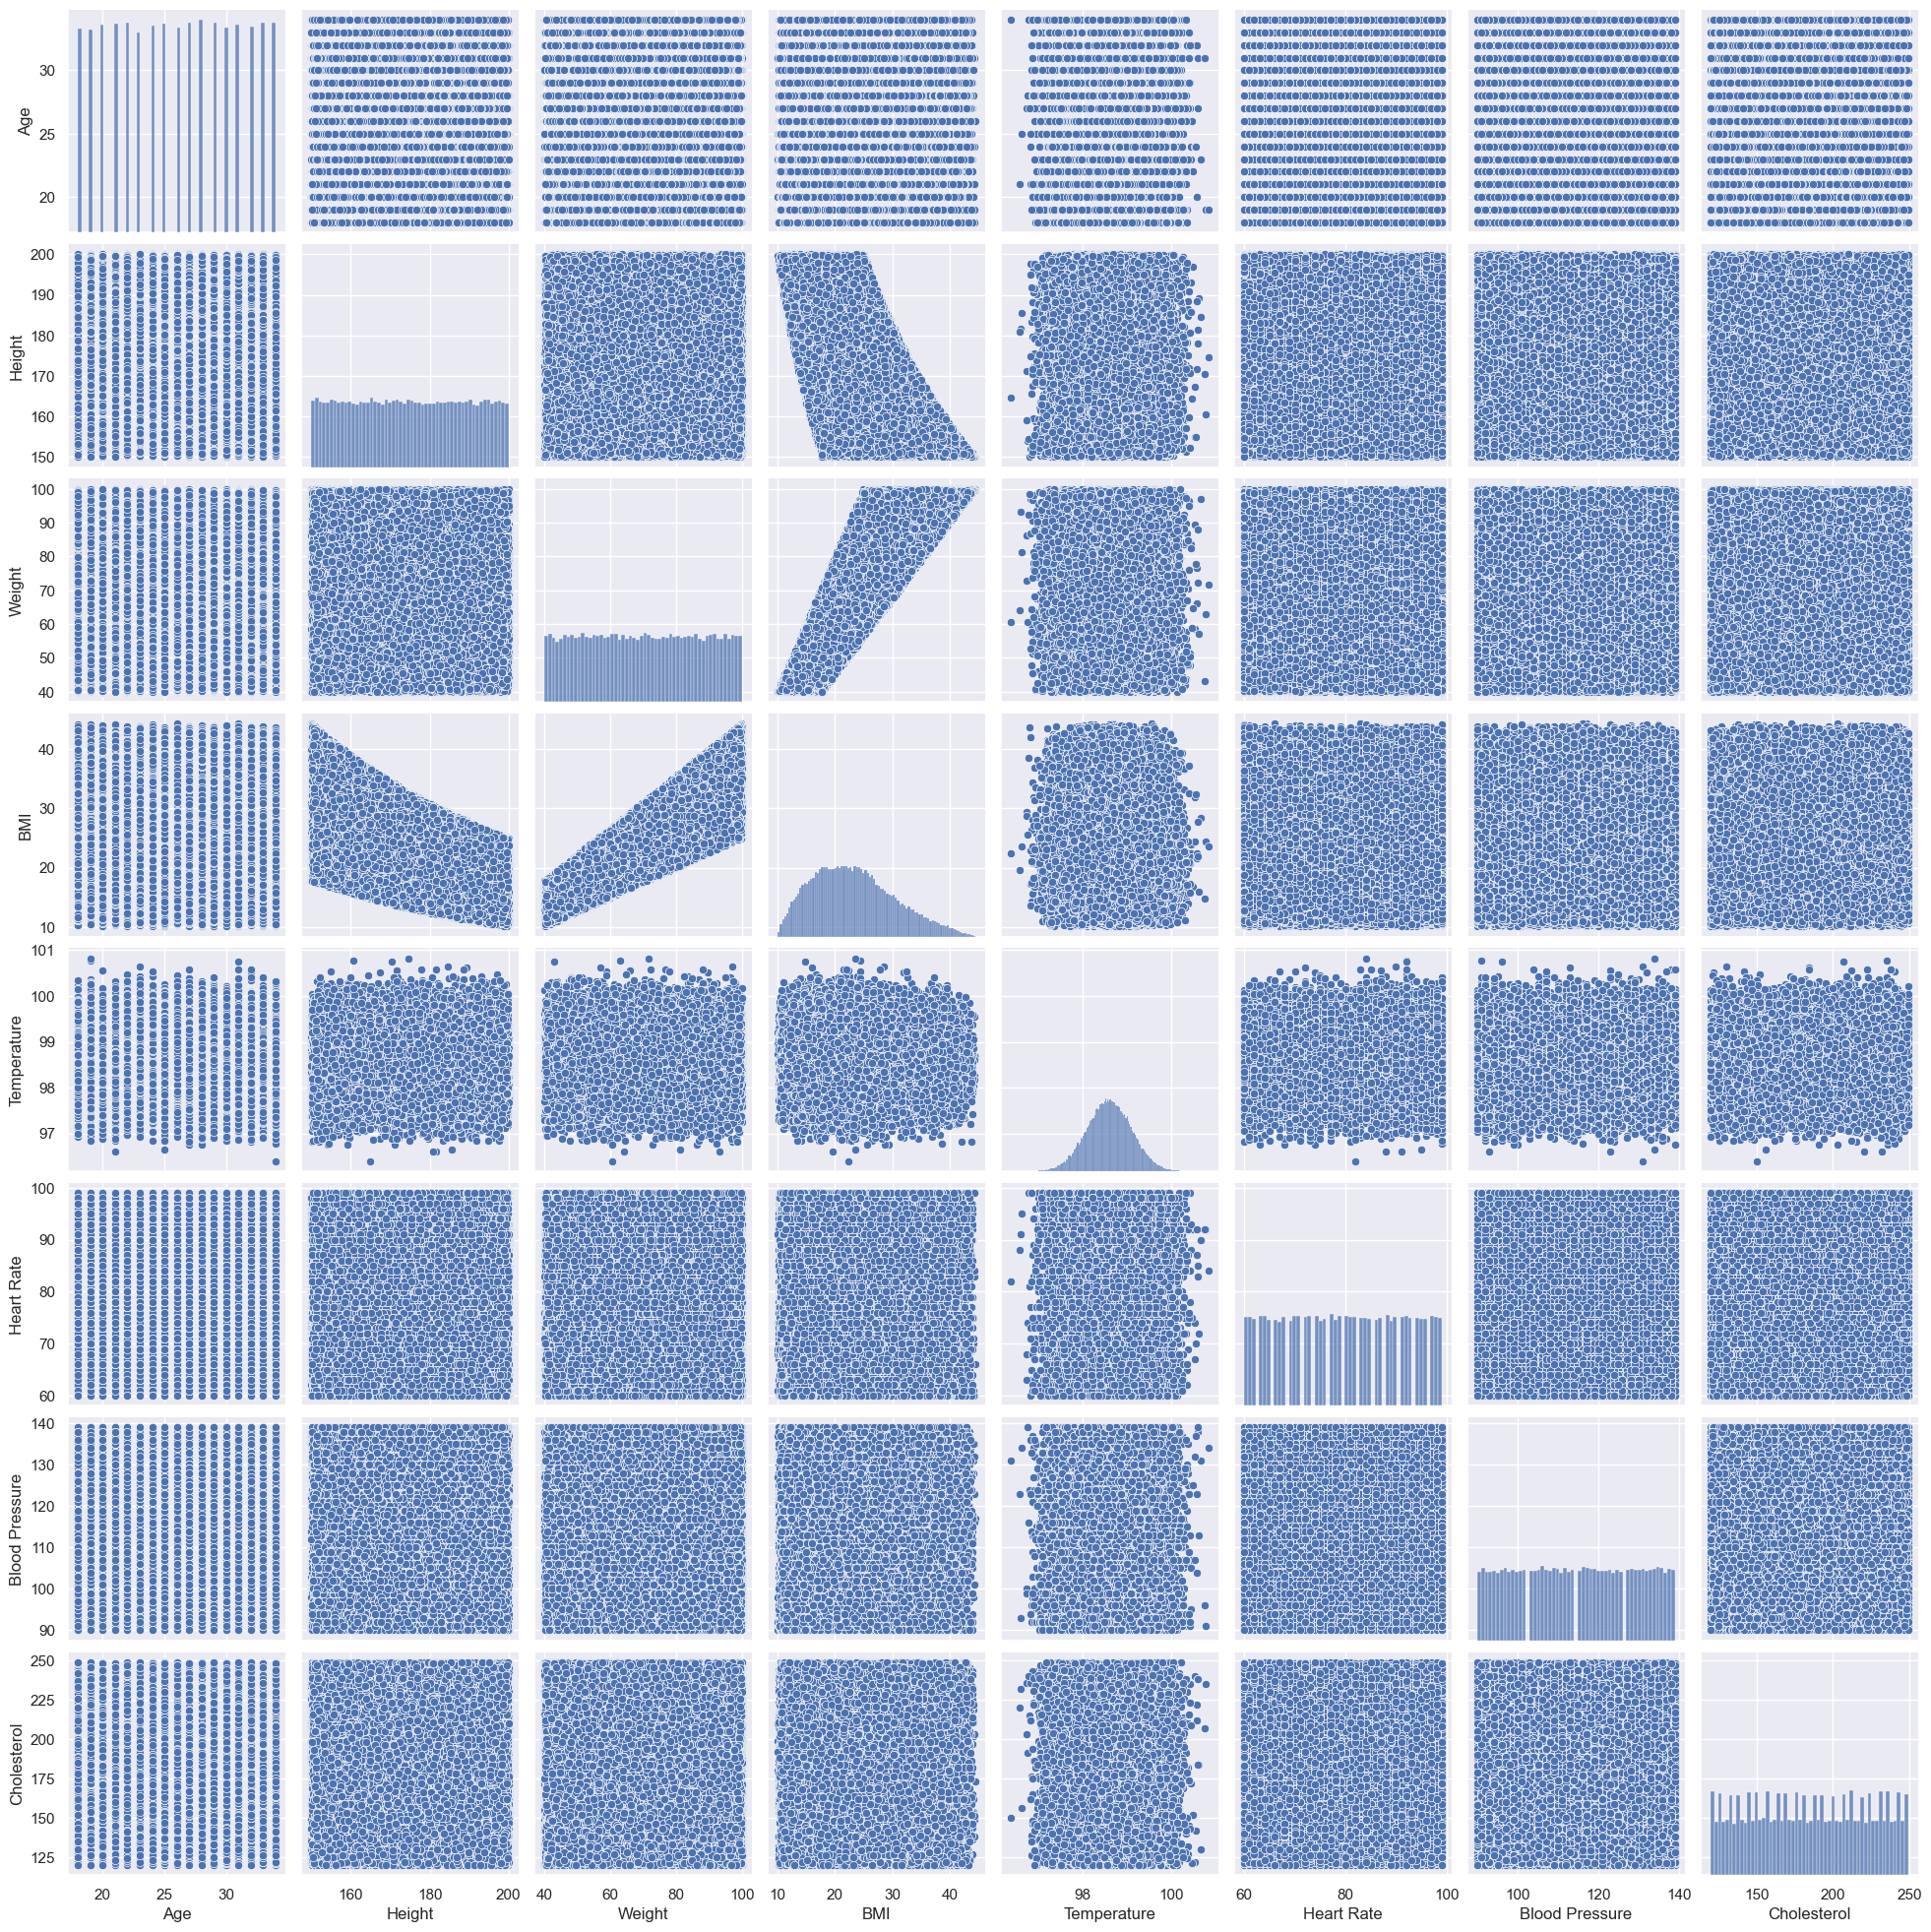

In [20]:
sns.pairplot(dataset[colonne_numeriques], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

### Analyse 
on peut voir **weight** et **height** sont fortement corrélés a **bmi**.en effet le bmi est égale weight/(height)^2(kg/m2) donc on pourrait remplacer les valeurs manqantes de bmi par ces valeurs.

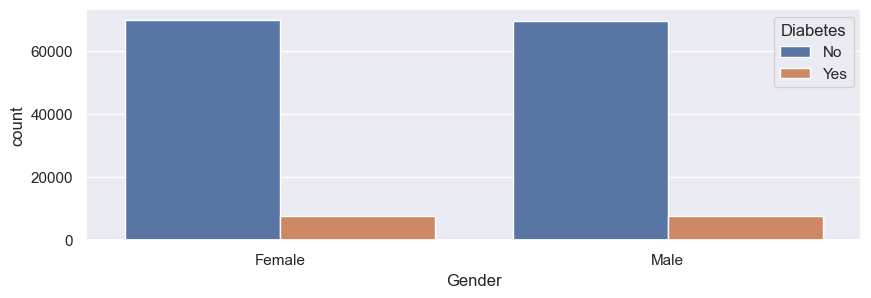

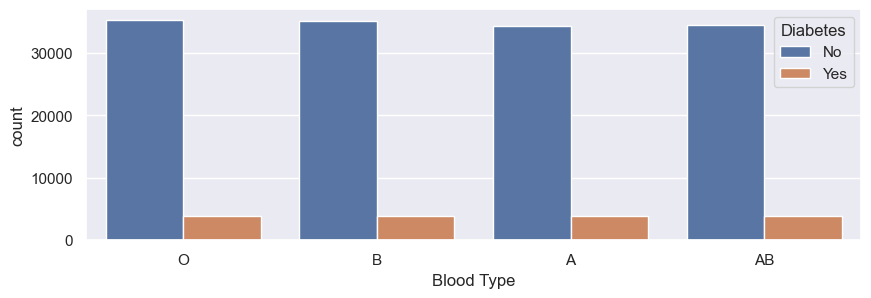

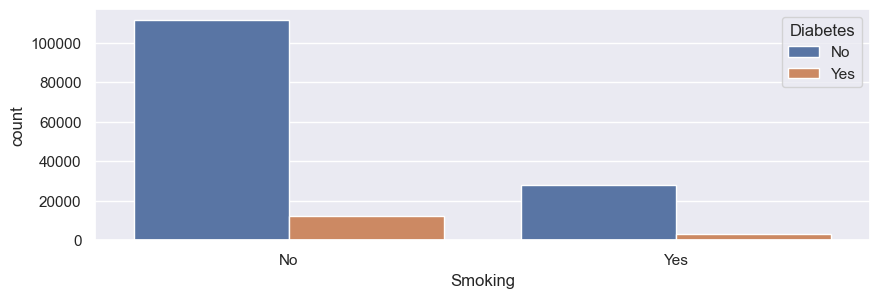

In [21]:
for values in colonne_categoriques:
    plt.figure(figsize=(10,3))
    sns.countplot(x=values, hue='Diabetes',data=dataset)

## Creation du modéle machine learning

### objectif: créer un modéle qui prédit d'une bonne maniére si la personne est diabétique(le cas yes).

In [22]:
#ici on va créer un premier modéle ou les bmi sont remplacés par weight/(height)^2(kg/m2) et dont tous les valeurs manquantes 
#on les suppriment
#fonction pour remplacer ces valeurs
def bmi_replace():
    bmi_is_nan=dataset[dataset["BMI"].isnull()]
    bmi_is_nan["BMI"]=bmi_is_nan["Weight"]/( bmi_is_nan["Height"]*0.01)**2  #on considére que weight(kg) et height(cm)
    return (bmi_is_nan.index,bmi_is_nan["BMI"])

In [23]:
#effectuer le data cleaning
index,valeur=bmi_replace()
dataset.loc[index,"BMI"]=valeur
dataset1=dataset.dropna()
dataset1.isnull().sum()

Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64

In [24]:
# les histogrammes des nous avaient permis de voir comment sont repartis nos données on pouvait clairement voir que
#les différententes valeurs depassaient lergement 1 ici on va les standarisés avec MinMaxScaler
#qui ******
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
dataset1[colonne_numeriques]=scaler.fit_transform(dataset1[colonne_numeriques])
dataset1.head()

Age  Gender    Height    Weight Blood Type       BMI  Temperature  \
2   1.218435  Female  0.525937 -0.824101          A -0.940311    -0.681929   
3   0.808819    Male  0.496542 -0.386070          B -0.604798     0.475379   
7   0.399204    Male  0.799387 -1.017484         AB -1.176329    -0.746865   
11  1.628050  Female  0.517539  0.366313         AB -0.058381    -0.965644   
15 -1.034450    Male -0.838497  1.521221          B  1.841970    -0.985044   

    Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
2    -0.303516        1.072745     0.840188      Yes      No  
3     1.690640       -0.179826    -1.151050       No     Yes  
7     0.476806        0.585634    -1.496198       No      No  
11    0.563508       -1.223634     1.663233       No      No  
15   -0.997135        0.794396    -1.443099       No      No

In [25]:
dataset1.describe()

Age        Height        Weight           BMI   Temperature  \
count  5.612200e+04  5.612200e+04  5.612200e+04  5.612200e+04  5.612200e+04   
mean   2.729643e-16  3.566514e-16 -3.929875e-16  3.503843e-16  1.761810e-14   
std    1.000009e+00  1.000009e+00  1.000009e+00  1.000009e+00  1.000009e+00   
min   -1.648873e+00 -1.725443e+00 -1.732370e+00 -1.883503e+00 -4.402615e+00   
25%   -8.296424e-01 -8.598801e-01 -8.686037e-01 -7.802375e-01 -6.746558e-01   
50%   -1.041154e-02 -9.370015e-03  4.827556e-03 -9.020424e-02 -3.078635e-03   
75%    8.088193e-01  8.677826e-01  8.681618e-01  6.618898e-01  6.818090e-01   
max    1.628050e+00  1.734193e+00  1.729643e+00  2.975531e+00  4.339307e+00   

         Heart Rate  Blood Pressure   Cholesterol  
count  5.612200e+04    5.612200e+04  5.612200e+04  
mean   3.504476e-16   -2.370079e-16  2.967664e-16  
std    1.000009e+00    1.000009e+00  1.000009e+00  
min   -1.690754e+00   -1.710745e+00 -1.708597e+00  
25%   -8.237300e-01   -8.756979e-01 -8.590021e-01  
50%   -5.716098e-05    2.893620e-02 -9.407072e-03  
75%    9.103180e-01    8.639830e-01  8.667379e-01  
max    1.690640e+00    1.699030e+00  1.716333e+00

In [26]:
#on va d'abord encoder nos colonnes catégoriqes avec OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse_output=False)

print(f"{encoder.fit_transform(dataset1[colonne_categoriques])} and {encoder.categories_}")

[[1. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 1. 0.]] and [array(['Female', 'Male'], dtype=object), array(['A', 'AB', 'B', 'O'], dtype=object), array(['No', 'Yes'], dtype=object)]


In [27]:
# on va ajouter les colonnes qui ont été encodé a notre dataset
encoded_colonnes=list(encoder.get_feature_names_out(colonne_categoriques))

dataset1[encoded_colonnes]=encoder.fit_transform(dataset1[colonne_categoriques])

dataset1.shape

(56122, 20)

In [28]:
dataset1.head()

Age  Gender    Height    Weight Blood Type       BMI  Temperature  \
2   1.218435  Female  0.525937 -0.824101          A -0.940311    -0.681929   
3   0.808819    Male  0.496542 -0.386070          B -0.604798     0.475379   
7   0.399204    Male  0.799387 -1.017484         AB -1.176329    -0.746865   
11  1.628050  Female  0.517539  0.366313         AB -0.058381    -0.965644   
15 -1.034450    Male -0.838497  1.521221          B  1.841970    -0.985044   

    Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  Gender_Female  \
2    -0.303516        1.072745     0.840188      Yes      No            1.0   
3     1.690640       -0.179826    -1.151050       No     Yes            0.0   
7     0.476806        0.585634    -1.496198       No      No            0.0   
11    0.563508       -1.223634     1.663233       No      No            1.0   
15   -0.997135        0.794396    -1.443099       No      No            0.0   

    Gender_Male  Blood Type_A  Blood Type_AB  Blood Type_B  Blood Type_O  \
2           0.0           1.0            0.0           0.0           0.0   
3           1.0           0.0            0.0           1.0           0.0   
7           1.0           0.0            1.0           0.0           0.0   
11          0.0           0.0            1.0           0.0           0.0   
15          1.0           0.0            0.0           1.0           0.0   

    Smoking_No  Smoking_Yes  
2          1.0          0.0  
3          0.0          1.0  
7          1.0          0.0  
11         1.0          0.0  
15         1.0          0.0

In [29]:
#on va faire un premier modéle pour le data pour lequel on avait supprimé tous les valeurs nulles
from sklearn.model_selection import train_test_split
train,test=train_test_split(dataset1,test_size=0.2,random_state=42)
train_set,test_set=train[colonne_numeriques+encoded_colonnes],test[colonne_numeriques+encoded_colonnes]
train_target,test_target=train["Diabetes"],test["Diabetes"]
train_set.head()

Age    Height    Weight       BMI  Temperature  Heart Rate  \
83563   1.628050 -1.118708  1.151915  1.748326     0.383442    1.170425   
84909   0.604012 -0.294544  1.062411  0.991325    -0.391701    0.390104   
24335  -1.239258 -1.404460  1.623163  2.506242     0.438304    0.823616   
112753  0.604012 -0.271404 -0.374606 -0.232466     0.673192   -0.737028   
51956   1.628050 -1.049762  0.486830  1.045367    -1.616749    0.910318   

        Blood Pressure  Cholesterol  Gender_Female  Gender_Male  Blood Type_A  \
83563        -1.501983     1.238436            1.0          0.0           0.0   
84909         0.516047     1.503934            0.0          1.0           1.0   
24335         0.655221     1.663233            1.0          0.0           0.0   
112753       -1.432396     1.424285            1.0          0.0           0.0   
51956         1.142332    -1.469649            1.0          0.0           0.0   

        Blood Type_AB  Blood Type_B  Blood Type_O  Smoking_No  Smoking_Yes  
83563             0.0           1.0           0.0         1.0          0.0  
84909             0.0           0.0           0.0         1.0          0.0  
24335             0.0           1.0           0.0         1.0          0.0  
112753            0.0           0.0           1.0         1.0          0.0  
51956             0.0           1.0           0.0         1.0          0.0

In [30]:
#on va ici tester pour plusieurs modéles 
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [31]:
%%time
from sklearn.metrics import accuracy_score
models={"LogisticRegression":LogisticRegression(),
        "DecisionTree":DecisionTreeClassifier(random_state=0),
        "RandomForest":RandomForestClassifier(random_state=0),
        "GrandiantBoost":GradientBoostingClassifier(random_state=0),
        "kneighbors":KNeighborsClassifier()
       }
for key,model in models.items():
    
    model.fit(train_set,train_target)
    
    if key=="kneighbors":
             train_pred = model.predict(train_set.values)
             test_pred = model.predict(test_set.values)
    else:
             train_pred = model.predict(train_set)
             test_pred = model.predict(test_set)
    train_accuracy = accuracy_score(train_target, train_pred)
    test_accuracy = accuracy_score(test_target, test_pred)
    
    print(f"Performance {key} sur training_set: {train_accuracy:.4f}")
    print(f"Performance {key} sur test_set: {test_accuracy:.4f}")

Performance LogisticRegression sur training_set: 0.9002
Performance LogisticRegression sur test_set: 0.9029
Performance DecisionTree sur training_set: 1.0000
Performance DecisionTree sur test_set: 0.8266
Performance RandomForest sur training_set: 1.0000
Performance RandomForest sur test_set: 0.9110
Performance GrandiantBoost sur training_set: 0.9007
Performance GrandiantBoost sur test_set: 0.9026
Performance kneighbors sur training_set: 0.9035
Performance kneighbors sur test_set: 0.8950
CPU times: total: 1min 12s
Wall time: 59.2 s


## Analyse
on peut voir que le decisionTree et RandomForest sont en overfitting ce qu'on va essayer de confirmer avec les learning curves.
aussi RandomForest a la meilleure performance

CPU times: total: 19min 56s
Wall time: 16min 55s


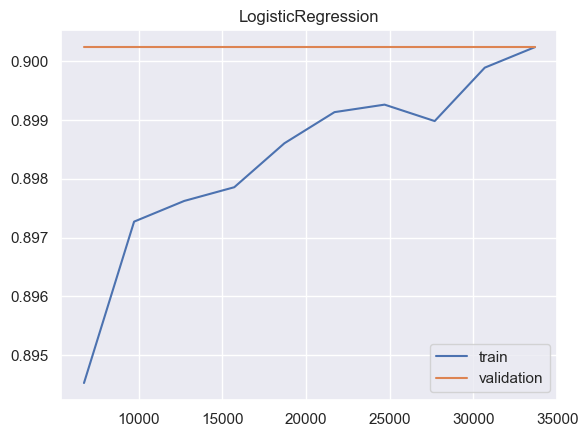

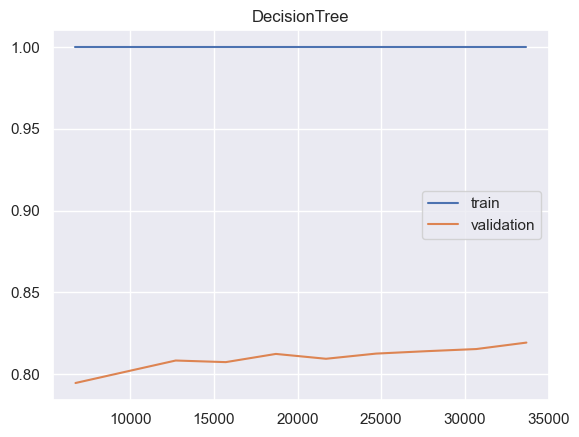

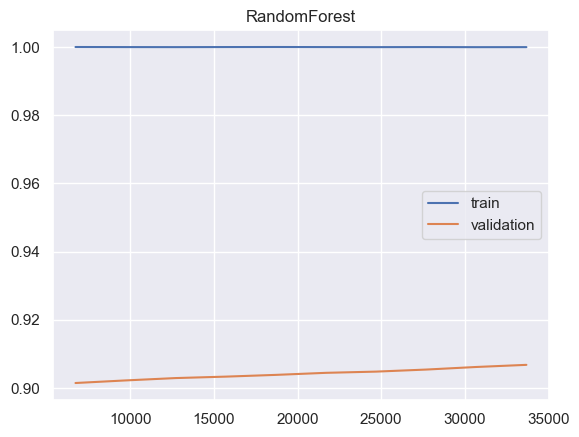

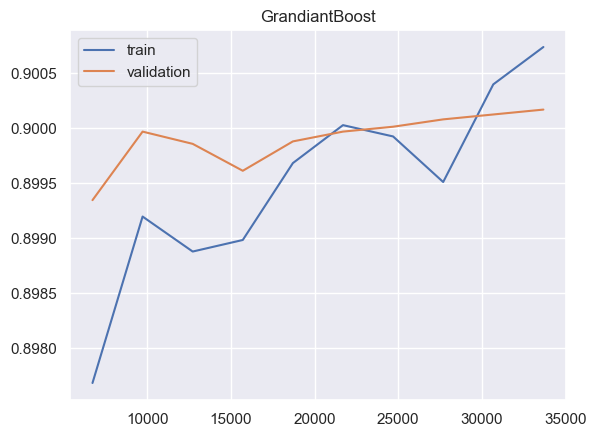

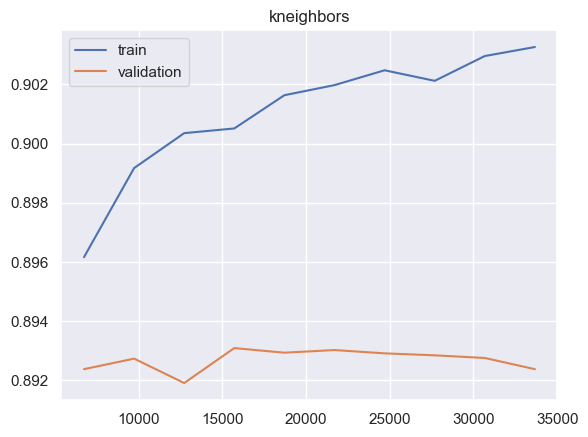

In [32]:
%%time
#On peut aussi voir si nos modéles sont en over/underfitting et la possibilité d'augmenter la precision en augmentant les 
#données d'entrainement
from sklearn.model_selection import learning_curve

for key,model in models.items():
        
        plt.figure()
        N,train_score,valid_score=learning_curve(model,train_set.values,train_target,
                                         train_sizes=np.linspace(0.2,1,10),cv=4)
        plt.plot(N,train_score.mean(axis=1),label="train")
        plt.plot(N,valid_score.mean(axis=1),label="validation")

        plt.legend()
        plt.title(key)

        plt.plot()

## Analyse
on voit que la performance augmente un peu au fure et à mesure qu'on augmente nos données Dans le cas du GrandiantBoosting ,le Randomforest  de même pour decisionTree et LogisticRegression .Toutefois il est clair que le modéle est en overfitting dans ces trois derniers cas mais le logisticRegression commence a bien généralisé lorsque les données augmentent.pour le cas de kneighbors les performances n'augmentent pas.

## Evaluation du modéle
comme on avait constaté que les classes n'étaient pas équilibrées notre évaluation ne va pas se baser  sur cette performance
mais plûtot sur l'analyse de matrice de confusions , le recall et la précision

LogisticRegression
        No:0  Yes:1
No:0   10135      0
Yes:0   1090      0
LogisticRegression
              precision    recall  f1-score   support

          No       0.90      1.00      0.95     10135
         Yes       0.00      0.00      0.00      1090

    accuracy                           0.90     11225
   macro avg       0.45      0.50      0.47     11225
weighted avg       0.82      0.90      0.86     11225

DecisionTree
       No:0  Yes:1
No:0   9056   1079
Yes:0   867    223
DecisionTree
              precision    recall  f1-score   support

          No       0.91      0.89      0.90     10135
         Yes       0.17      0.20      0.19      1090

    accuracy                           0.83     11225
   macro avg       0.54      0.55      0.54     11225
weighted avg       0.84      0.83      0.83     11225

RandomForest
        No:0  Yes:1
No:0   10135      0
Yes:0    999     91
RandomForest
              precision    recall  f1-score   support

          No       0.91 

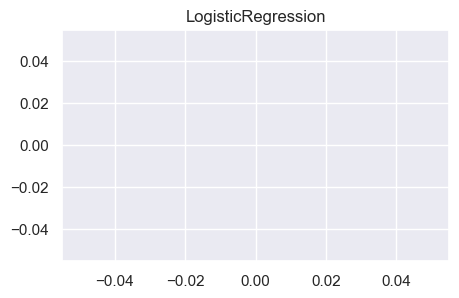

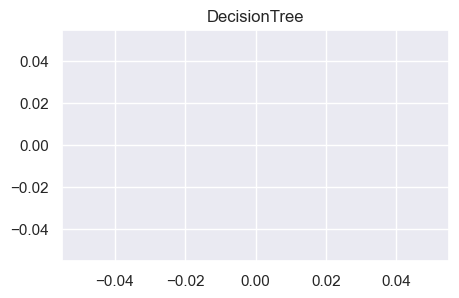

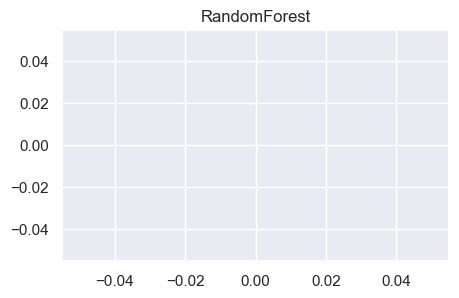

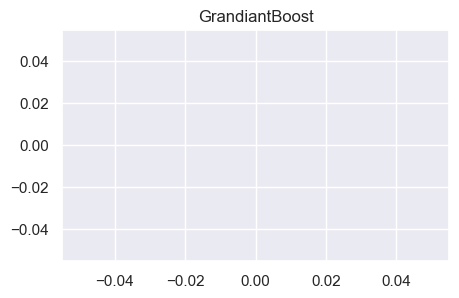

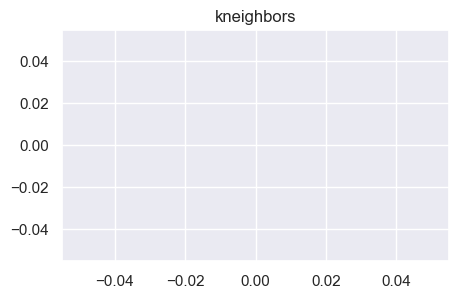

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

for key,model in models.items():
    
    plt.figure(figsize=(5,3))
    model.fit(train_set.values,train_target)
    test_pred = model.predict(test_set.values)
    confus_mat=pd.DataFrame(confusion_matrix(test_target,test_pred),columns=['No:0', 'Yes:1'], index=['No:0', 'Yes:1'])
    print(key)
    print(confus_mat)
    print(key)
    print(classification_report(test_target,test_pred))
    plt.title(key)
    plt.plot()
   

 ## Analyse
On constate que presque tous nos modéles tendent à prédire la classe No qui est la classe majoritaire .toutefois certains modéles réussissent à bien prédire avec un recall modéré la classe Yes c'est le cas du decisionTree avec une precision de 0.17 et un rappel de 0.20.ce probléme serait du au fait que nos données ne sont pas équilibrées.On va tenter une nouvelle approche pour gérer ce probléme.

## Approche
##### 1) au lieu de supprimer tous les champs de valeurs manquantes on va les remplacer,on peut aussi supprimer les outliers(valeurs abérantes) et utiliser les under/oversampling pour réequilibrer les données,génération de polynômes pour mieux capter les caractéritiques de nos données.
##### 2) on va aussi utiliser le score f1 qui est plus intéressant pour evaluer nos modéles
##### 2) on va faire aussi du feature selection avec SelectKBest
##### 3) on utilisera les  pipelines 
##### 4) on essai de trouver les meilleurs hyperparamétres avec greadsearchcv

In [34]:
# on va faire cette approche sans utiliser les Under/OverSampling et voir les performances
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV,learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures
from sklearn.impute import SimpleImputer

### Analyse des resultats avec différentes maniéres qu'on a fait le preprocessing
1)le premier modéle **meilleur modéle** :DecisionTree(precision 0.17,recall 0.20 , f1_score:0.19).
2)pour la deuxieme stratégie on a remplacé les valeurs manquantes par leur moyenne.DécisionTree(precision 0.18 , recall 0.19 ,f1_score:0.18).
3) on remplace par la médiane . **meilleur modéle**:DecisionTree(precision:0.18  ,recall:0.19  ,f1_score =0.18)

on va plûtot remplacer par la moyenne.il donne de meilleur résultat pour tous nos modéles.

# Preprocessing

In [35]:

def imputer(dataset):
    index, valeur = bmi_replace()  
    dataset.loc[index, "BMI"] = valeur
    #dataset.dropna(inplace=True) # au lieu de les supprimer tous les valeurs manquantes.on remplace par les moyennes(1stratégie)
    #imputer = SimpleImputer(strategy='mean') 
    imputer = SimpleImputer(strategy='median')
    dataset[colonne_numeriques]= imputer.fit_transform(dataset[colonne_numeriques])
    return dataset.dropna()

def encoder(dataset, colonne_categoriques):
    encoder = OneHotEncoder(sparse_output=False)
    encoded_data = encoder.fit_transform(dataset[colonne_categoriques])
    encoded_colonnes = list(encoder.get_feature_names_out(colonne_categoriques))
    dataset[encoded_colonnes] = encoded_data
    return dataset

def preprocessing(dataset):
   
    data=imputer(dataset)

    return encoder(data, colonne_categoriques)

def select_train_test_set(dataset,colonne_numeriques,encoded_colonnes):
    train,test=train_test_split(dataset1,test_size=0.2,random_state=42)
    train_set,test_set=train[colonne_numeriques+encoded_colonnes],test[colonne_numeriques+encoded_colonnes]
    train_target,test_target=train["Diabetes"],test["Diabetes"]
    return train_set,train_target,test_set,test_target


In [36]:
clean_data=preprocessing(dataset)
clean_data

from IPython.display import HTML

def telecharger_csv(data, nom_fichier='clean_data.csv'):
    data.to_csv(nom_fichier, index=False)
    lien_telechargement = f'<a href="{nom_fichier}" download="{nom_fichier}">Télécharger le fichier CSV</a>'
    display(HTML(lien_telechargement))
telecharger_csv(clean_data)

In [37]:
train_set,train_target,test_set,test_target=select_train_test_set(clean_data,colonne_numeriques,encoded_colonnes)
train_set.head()

Age    Height    Weight       BMI  Temperature  Heart Rate  \
83563   1.628050 -1.118708  1.151915  1.748326     0.383442    1.170425   
84909   0.604012 -0.294544  1.062411  0.991325    -0.391701    0.390104   
24335  -1.239258 -1.404460  1.623163  2.506242     0.438304    0.823616   
112753  0.604012 -0.271404 -0.374606 -0.232466     0.673192   -0.737028   
51956   1.628050 -1.049762  0.486830  1.045367    -1.616749    0.910318   

        Blood Pressure  Cholesterol  Gender_Female  Gender_Male  Blood Type_A  \
83563        -1.501983     1.238436            1.0          0.0           0.0   
84909         0.516047     1.503934            0.0          1.0           1.0   
24335         0.655221     1.663233            1.0          0.0           0.0   
112753       -1.432396     1.424285            1.0          0.0           0.0   
51956         1.142332    -1.469649            1.0          0.0           0.0   

        Blood Type_AB  Blood Type_B  Blood Type_O  Smoking_No  Smoking_Yes  
83563             0.0           1.0           0.0         1.0          0.0  
84909             0.0           0.0           0.0         1.0          0.0  
24335             0.0           1.0           0.0         1.0          0.0  
112753            0.0           0.0           1.0         1.0          0.0  
51956             0.0           1.0           0.0         1.0          0.0

In [38]:
logistic=make_pipeline(PolynomialFeatures(2),SelectKBest(score_func=f_classif, k=4)
                           ,LogisticRegression())

decisionTree=make_pipeline(PolynomialFeatures(2),SelectKBest(score_func=f_classif, k=4)
                           ,StandardScaler(),DecisionTreeClassifier(random_state=0))

random=make_pipeline(PolynomialFeatures(2),SelectKBest(score_func=f_classif, k=4)
                     ,RandomForestClassifier(random_state=0))

Gdb=make_pipeline(PolynomialFeatures(2),SelectKBest(score_func=f_classif, k=4)
                  ,StandardScaler(),GradientBoostingClassifier(random_state=0))

kneighbors=make_pipeline(PolynomialFeatures(2),SelectKBest(score_func=f_classif, k=4)
                  ,StandardScaler(),KNeighborsClassifier())

In [39]:
pipelines={
         "logisticRegression":logistic,
        "DecisionTree":decisionTree,
        "RandomForest":random,
        "GrandiantBoost":Gdb,
        "kneighbors":kneighbors
       }

## Evaluation des modéle

logisticRegression
        No:0  Yes:1
No:0   10135      0
Yes:1   1090      0
logisticRegression
              precision    recall  f1-score   support

          No       0.90      1.00      0.95     10135
         Yes       0.00      0.00      0.00      1090

    accuracy                           0.90     11225
   macro avg       0.45      0.50      0.47     11225
weighted avg       0.82      0.90      0.86     11225

DecisionTree
       No:0  Yes:1
No:0   9177    958
Yes:1   882    208
DecisionTree
              precision    recall  f1-score   support

          No       0.91      0.91      0.91     10135
         Yes       0.18      0.19      0.18      1090

    accuracy                           0.84     11225
   macro avg       0.55      0.55      0.55     11225
weighted avg       0.84      0.84      0.84     11225

RandomForest
       No:0  Yes:1
No:0   9991    144
Yes:1   982    108
RandomForest
              precision    recall  f1-score   support

          No       0.91    

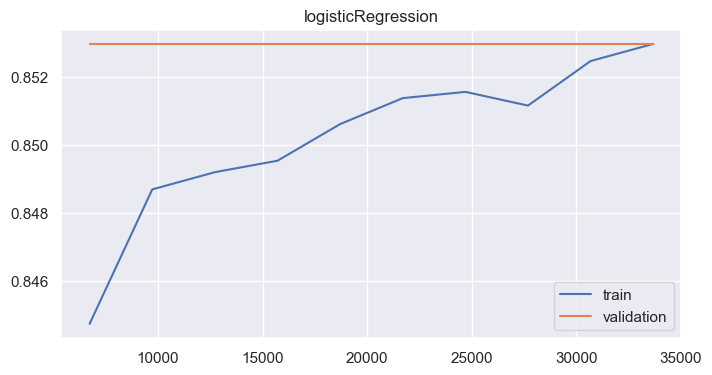

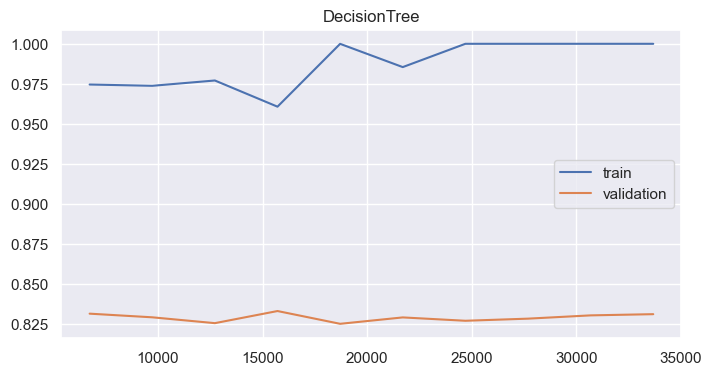

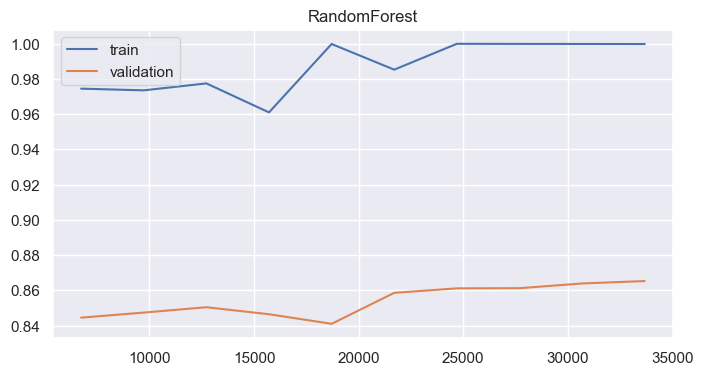

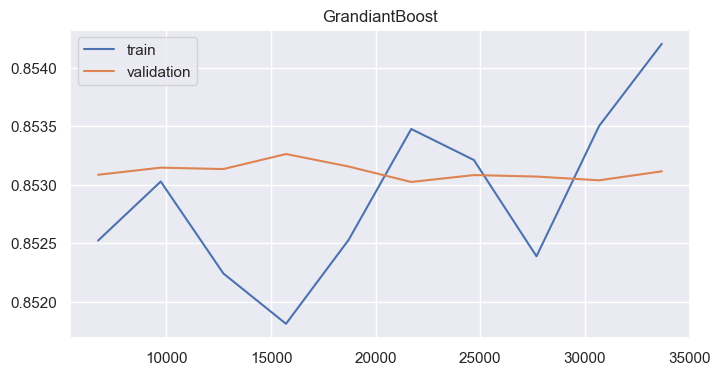

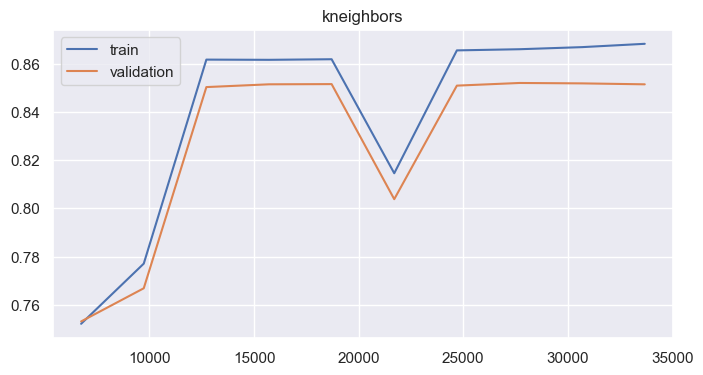

In [40]:
%%time
from sklearn.metrics import confusion_matrix, classification_report,make_scorer,f1_score

f1_scorer = make_scorer(f1_score, average='weighted')

def evaluer(model,train_set,train_target,test_set,test_target,cv):

    pipeline.fit(train_set, train_target)  
    test_pred = pipeline.predict(test_set.values)
    confus_mat = pd.DataFrame(confusion_matrix(test_target, test_pred), columns=['No:0', 'Yes:1'], index=['No:0', 'Yes:1'])
    print(key)
    print(confus_mat)
    print(key)
    print(classification_report(test_target, test_pred))
    plt.figure(figsize=(8, 4))
    N, train_score, valid_score = learning_curve(pipeline, train_set.values, train_target,scoring=f1_scorer
                                                 ,train_sizes=np.linspace(0.2, 1, 10), cv=cv)
    plt.plot(N, train_score.mean(axis=1), label="train")
    plt.plot(N, valid_score.mean(axis=1), label="validation")
    plt.legend()
    plt.title(key)
    plt.plot()

for key, pipeline in pipelines.items():

    evaluer(pipeline,train_set,train_target,test_set,test_target,4)
   

On peut constater que le knn généralise mieux que les autres modéles.

## Amelioration du modéle selectionné

In [41]:
%%time
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
param_grid = {
    'decisiontreeclassifier__max_depth': [ None,5, 10, 15],  # Profondeur maximale des arbres
    'decisiontreeclassifier__criterion': ['gini', 'entropy']  # Critère de qualité de la division
}
grid=GridSearchCV(decisionTree,param_grid,cv=5,scoring="recall")

grid.fit(train_set,train_target)

predicted=grid.predict(test_set)

print(classification_report(test_target, predicted))


              precision    recall  f1-score   support

          No       0.91      0.91      0.91     10135
         Yes       0.18      0.19      0.18      1090

    accuracy                           0.84     11225
   macro avg       0.55      0.55      0.55     11225
weighted avg       0.84      0.84      0.84     11225

CPU times: total: 24 s
Wall time: 27.1 s


## On evalue nos modéles avec les données qu'on a équilibré avec Nearmiss

DecisionTree
       No:0  Yes:1
No:0   8069   2066
Yes:1   873    217
DecisionTree
              precision    recall  f1-score   support

          No       0.90      0.80      0.85     10135
         Yes       0.10      0.20      0.13      1090

    accuracy                           0.74     11225
   macro avg       0.50      0.50      0.49     11225
weighted avg       0.82      0.74      0.78     11225

kneighbors
        No:0  Yes:1
No:0   10135      0
Yes:1   1090      0
kneighbors
              precision    recall  f1-score   support

          No       0.90      1.00      0.95     10135
         Yes       0.00      0.00      0.00      1090

    accuracy                           0.90     11225
   macro avg       0.45      0.50      0.47     11225
weighted avg       0.82      0.90      0.86     11225



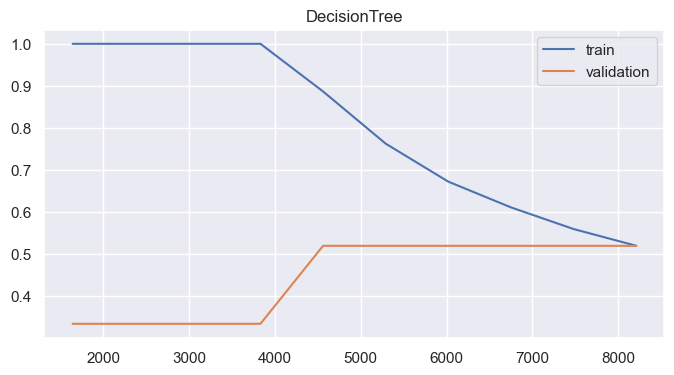

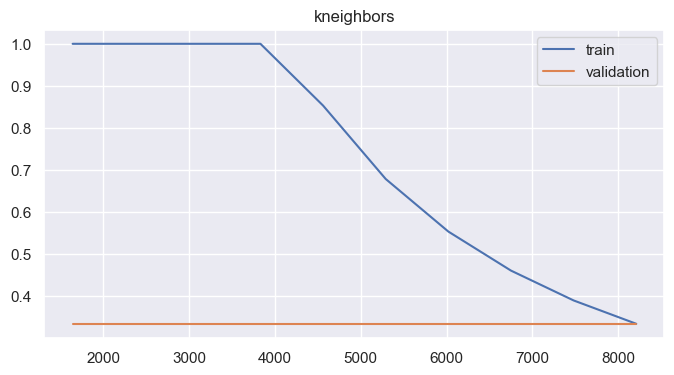

In [64]:
decisionTree=make_pipeline(PolynomialFeatures(2),SelectKBest(score_func=f_classif, k=4)
                           ,StandardScaler(),DecisionTreeClassifier(random_state=0))


kneighbors=make_pipeline(PolynomialFeatures(2),SelectKBest(score_func=f_classif, k=4)
                  ,StandardScaler(),KNeighborsClassifier())


pipelines2={
        "DecisionTree":decisionTree,
        "kneighbors":kneighbors
       }


from imblearn.under_sampling import NearMiss
nr = NearMiss()

x_train_miss, y_train_miss = nr.fit_resample(train_set,train_target)

for key, pipeline in pipelines3.items():

    evaluer(pipeline,x_train_miss,y_train_miss,test_set,test_target,12)

lorquon'on équilibre les données avec nearmiss on voit que le modéle performme mieux en terme de recall et n'est plus en overfitting.